# Mini Project #1: Baseball Analytics

The overall purpose of this mini-project is to predicting MLB wins per season by modeling data to KMeans clustering model and linear regression models.

## Part 3: Analysis/Modeling

In this part of the project, you are going to conduct actual analysis on the data your just processed in Part 1 & 2. The tasks in the part include:
- K-means Clustering: pre-modeling part that provides insights toward the data;
- Linear Regression: predict Wins (continuous) using trained linear regression model;
- Logistic Regression: predict Win_bins (categorical) using trained logistic regression model __on your own__.

Let's get started.

In [1]:
# import dependencies
import pandas as pd
import numpy as np

In [2]:
# read-in required data
# features for analysis
data_features = pd.read_csv('../ba545-data/baseball_analytics_features.csv', header=0, index_col=0)

# continuous target `wins`
wins = pd.read_csv('../ba545-data/baseball_analytics_wins.csv',  index_col=0, names = ['wins'])

# categorical target `Win_bins`
win_bins = pd.read_csv('../ba545-data/baseball_analytics_target.csv',  index_col=0, names = ['win_bins'])

# display if data are read correctly
print(data_features.head())
print(wins.head())
print(win_bins.head())

     G    R    AB     H   2B  3B   HR   BB      SO   SB  ...  decade_1980.1  \
0  162  744  5424  1331  218  22  189  681  1068.0   37  ...              0   
1  162  718  5499  1377  232  35  137  602   917.0   46  ...              0   
2  161  597  5506  1378  208  38   95  448   916.0   43  ...              0   
3  162  544  5362  1297  186  27  102  472   920.0   49  ...              0   
4  162  527  5354  1279  200  36   92  443   973.0  107  ...              0   

   decade_1990  decade_1990.1  decade_2000  decade_2000.1  decade_2010  \
0            0              0            0              0            0   
1            0              0            0              0            0   
2            0              0            0              0            0   
3            0              0            0              0            0   
4            0              0            0              0            0   

   decade_2010.1  R_per_game  RA_per_game       rpg  
0              0    4.5925

Check the __data types__ of `data_features`.

In [3]:
## Write your code here
data_features.dtypes

G                  int64
R                  int64
AB                 int64
H                  int64
2B                 int64
3B                 int64
HR                 int64
BB                 int64
SO               float64
SB                 int64
RA                 int64
ER                 int64
ERA              float64
CG                 int64
SHO                int64
SV                 int64
IPouts             int64
HA                 int64
HRA                int64
BBA                int64
SOA                int64
E                  int64
DP               float64
FP               float64
decade_1910        int64
decade_1910.1      int64
decade_1920        int64
decade_1920.1      int64
decade_1930        int64
decade_1930.1      int64
decade_1940        int64
decade_1940.1      int64
decade_1950        int64
decade_1950.1      int64
decade_1960        int64
decade_1960.1      int64
decade_1970        int64
decade_1970.1      int64
decade_1980        int64
decade_1980.1      int64


### K-means Clustering

K-means clustering, as a basic clustering technique, can capture internal relationship(s) between your data points. Sometimes we use (k-means) clustering as a pre-modeling step for supervised learning: essentially, we can use k-means clsutering to capture the internal relationship of the features, and then capture the relationship in an additional feature that being used as an input to a classification/regression model.

One key step in k-means clustering is to determine the value of `k` - how many clusters? If we want to use the clustering results as an additional (categorical) feature, we should not have a higher value of `k`. Also, increasing value of `k` may increase the erroneous relationship being captured. The k-means model is provided in `sklearn.clustering`.

In this tutorial, we use **Grid Search** to find the best value of `k`. To conduct Grid Search, you need a range of `k` and a metric that measures the performance under each value of `k`. In this context, we select the metric as the [**silhouette score**](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) (`s_score`), which is provided in `sklearn.metrics`.

In [4]:
# import dependencies
from sklearn.cluster import KMeans
from sklearn import metrics

Silhouette score is a visualized way of measuring the performance of clustering. Thus, we need to import `matplotlib` to visualize the clustering.

In [5]:
# import and initialize matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

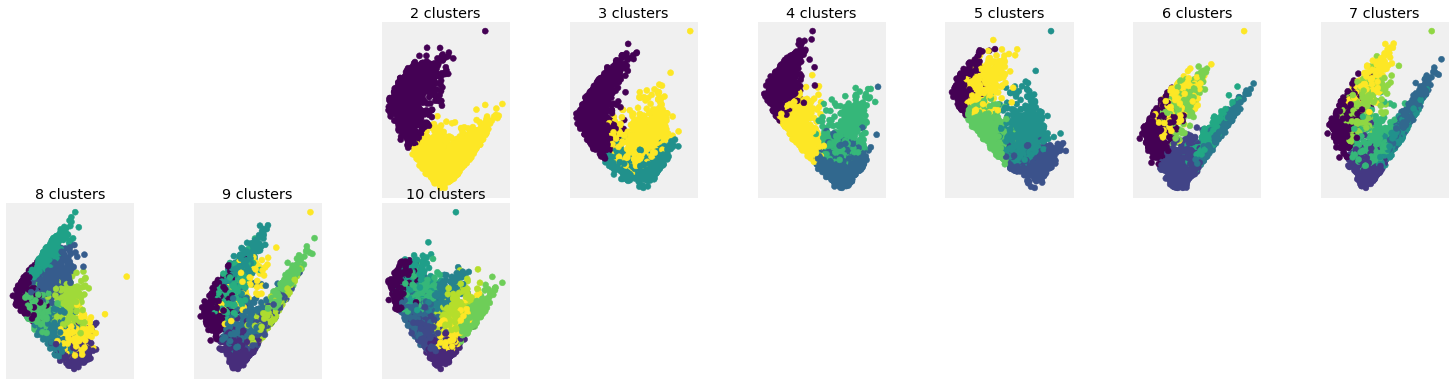

In [6]:
# We need to create a figure that contains different value of `k` as sub-figures
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.5)

#### complete your code below
#### create an empty dictionary `s_score_dict` that we will use to store silhouette scores
#### for different `k` values; use different `k` values as keys, and corresponding
#### silhouette score as values

s_score_dict={}

#### now we create a for-loop go through a range of `k` values in [2, 11]
for i in range(2,11):
    #### add a sub-figure `ax` to `fig` using `.add_subplot(8,8,i+1,xticks=[],yticks=[])`
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])  
    # conduct the k-means clustering using `k = i`
    km = KMeans(n_clusters=i, random_state=2019)
    # any clustering model needs a distance metric, in this case, `distance` is the distance between
    # any pair of data points
    distances = km.fit_transform(data_features)
    # clustering models will generate `labels` - if you want to create the additional feature 
    # as discussed above, you will use `labels` as its values
    labels = km.labels_
    # you will then applied the fitted `km` model to `data_faetures`
    l= km.fit_predict(data_features)
    # Silhouette score is computed between `data_features` and `l`
    s_s= metrics.silhouette_score(data_features, l)
    #### update the `s_score_dict` using `i` as key and `s_s` as value
    s_score_dict[i]=[s_s]
    # we will plot the clusters out using scatter plot
    plt.scatter(distances[:,0], distances[:,1], c=labels)
    #### add 'i clusters' as the title of each sub-figure
    plt.title(str(i) + ' clusters')
    
#### show plot
plt.show()

Visually, we know that 2-clusters looks the best. Let's double check the silhouette score to make sure.

In [7]:
s_score_dict

{2: [0.3906995996702737],
 3: [0.3380755027150749],
 4: [0.25246236335148325],
 5: [0.2356695933134701],
 6: [0.21405239308252447],
 7: [0.19565460925714873],
 8: [0.18685862927082997],
 9: [0.17555790874289945],
 10: [0.1714650788957459]}

As observed in the figure, 2-cluster model returns the highest silhouette score. 

__Rule of thumb__: However, we normally start searching for `k` value at `3`.

So we are going to build a k-means model of `k=3`, and then add the `cluster_label` as a feature.

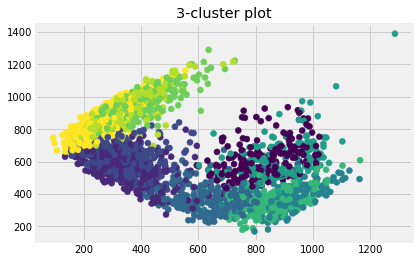

In [8]:
#### complete your code below
#### create a model called `kmeans_model` with `n_clusters = 3` and `random_state = 2019`
kmeans_model=KMeans(n_clusters=3, random_state=2019)

#### capture `distances` by fit (`fit_transform`) `kmeans_model` to `data_features`
distances=kmeans_model.fit_transform(data_features)

#### record labels of clusters in `labels`
labels=km.labels_

#### create a scatter plot (plt.scatter()) to plot the clusters
plt.scatter(distances[:,0], distances[:,1], c=labels)

#### add title to plot as `3-cluster plot`
plt.title('3-cluster plot')

#### show the plot
plt.show()

Looks pretty good, correct? Now let's add the `labels` to `data_features` as an additional feature so that we can use it in further analysis.

In [9]:
# look at `labels`
print(labels)
print(len(labels))
print(data_features.shape[0])

[8 2 1 ... 7 7 7]
2265
2265


In [10]:
#### complete your code below
#### add `labels` to `data_features`
#### add `labels` as a column in `data_features` namely `label`
data_features['label']=labels

#df['labels']='data_features'
#data_features.append('labels')

#### double check by looking at the first 5 rows of `data_features`
data_features.head(5)

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,decade_1990,decade_1990.1,decade_2000,decade_2000.1,decade_2010,decade_2010.1,R_per_game,RA_per_game,rpg,label
0,162,744,5424,1331,218,22,189,681,1068.0,37,...,0,0,0,0,0,0,4.592593,4.839506,4.525175,8
1,162,718,5499,1377,232,35,137,602,917.0,46,...,0,0,0,0,0,0,4.432099,4.358025,4.460518,2
2,161,597,5506,1378,208,38,95,448,916.0,43,...,0,0,0,0,0,0,3.708075,4.099379,3.946881,1
3,162,544,5362,1297,186,27,102,472,920.0,49,...,0,0,0,0,0,0,3.358025,3.401235,4.035670,1
4,162,527,5354,1279,200,36,92,443,973.0,107,...,0,0,0,0,0,0,3.253086,3.512346,3.988293,1


### Linear Regression

We will train linear regression models to predict a continuous target `wins`.

In [11]:
#### complete your code below
#### first we need to create the dataset we will use for the regression model
#### `reg_data` = `data_features` + `wins`
reg_data = pd.concat([data_features,wins], axis=1)
#### double check by looking at the first 5 rows of `reg_data`
reg_data.head()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,decade_1990.1,decade_2000,decade_2000.1,decade_2010,decade_2010.1,R_per_game,RA_per_game,rpg,label,wins
0,162,744,5424,1331,218,22,189,681,1068.0,37,...,0,0,0,0,0,4.592593,4.839506,4.525175,8,70
1,162,718,5499,1377,232,35,137,602,917.0,46,...,0,0,0,0,0,4.432099,4.358025,4.460518,2,86
2,161,597,5506,1378,208,38,95,448,916.0,43,...,0,0,0,0,0,3.708075,4.099379,3.946881,1,70
3,162,544,5362,1297,186,27,102,472,920.0,49,...,0,0,0,0,0,3.358025,3.401235,4.035670,1,82
4,162,527,5354,1279,200,36,92,443,973.0,107,...,0,0,0,0,0,3.253086,3.512346,3.988293,1,75


In [12]:
#### complete your code below
#### investigate descriptive stats using describe()
reg_data.describe()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,decade_1990.1,decade_2000,decade_2000.1,decade_2010,decade_2010.1,R_per_game,RA_per_game,rpg,label,wins
count,2265.000000,2265.00000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,...,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000
mean,159.010155,699.28521,5415.782340,1414.788962,245.046799,44.397792,118.361148,513.631788,834.424724,98.186755,...,0.098013,0.132450,0.132450,0.092715,0.092715,4.398085,4.397847,4.398195,4.372185,79.211479
std,3.741585,102.29043,171.911625,106.173052,45.564428,19.605096,55.661793,83.964601,248.585233,50.999021,...,0.297398,0.339055,0.339055,0.290097,0.290097,0.641416,0.651584,0.409479,3.003623,13.020365
min,150.000000,371.00000,4768.000000,1044.000000,110.000000,6.000000,3.000000,282.000000,308.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.409091,2.458065,3.385450,0.000000,36.000000
25%,155.000000,633.00000,5301.000000,1348.000000,213.000000,30.000000,80.000000,457.000000,617.000000,61.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.975155,3.956790,4.132241,2.000000,70.000000
50%,162.000000,696.00000,5458.000000,1412.000000,246.000000,39.000000,123.000000,511.000000,855.000000,89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.382716,4.358025,4.383279,4.000000,80.000000
75%,162.000000,762.00000,5539.000000,1487.000000,278.000000,55.000000,159.000000,568.000000,1015.000000,126.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.783951,4.797546,4.727984,7.000000,89.000000
max,165.000000,1067.00000,5781.000000,1783.000000,376.000000,129.000000,264.000000,835.000000,1543.000000,347.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,6.896104,7.685897,5.549028,9.000000,116.000000


Let's import the dependencies for building and evaluation a linear regression model.

In [13]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error, mean_squared_error

Then let's define the features and target. There are two ways of doing this. Let's try the first.

In [14]:
#### complete your code below
#### create a variable `reg_values` which are the values in `reg_data`
reg_values=reg_data.values

#### create a variable `X` which contains all columns in `reg_values` besides the last 
X=reg_values[:,:-1]

#### create a variable `y` which contains the last column in `reg_values`
y=reg_values[:,-1]

Here is an alternative method:

In [15]:
#### complete your code below
#### create a variable `Xa` which contains all values in `data_features`
Xa=data_features.values

#### create a variable `ya` which contains values in `wins`
ya=wins.values

Now we need to split our data into training (`X_train`, `y_train`) and testing (`X_test`, `y_test`).

In [16]:
#### complete your code below
#### import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

#### split X, y into training and testing, using 75/25 split, and set `random_state = 2019`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2019)

In [17]:
# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [18]:
# calculate the MAE
mae = mean_absolute_error(y_test, y_pred)

# Print `mae`
print(mae)

2.789065830082801


In [19]:
# Calculate the RMSE

#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

3.5328676995807586


You can print your linear regression model.

In [20]:
lr.coef_

array([-2.19204776e-01,  3.59040547e-02, -3.31178720e-02,  2.44703770e-02,
        3.98300021e-03,  1.24645958e-03,  1.94472295e-03, -6.14468411e-03,
        4.81471081e-05, -3.79920885e-03,  3.89187105e-02, -8.55322855e-02,
        1.35034700e+01,  1.08408311e-01,  1.61921270e-01,  3.04378458e-01,
        6.02012281e-02, -7.18205590e-03, -8.01466225e-03, -7.49571312e-03,
        8.96864698e-04, -4.50074251e-02,  4.27689324e-03, -2.19638309e+02,
       -1.40080345e+00, -1.40080345e+00, -6.39945006e-01, -6.39945006e-01,
        7.64407714e-01,  7.64407714e-01,  1.34657861e+00,  1.34657861e+00,
        5.32325003e-01,  5.32325003e-01,  2.58988259e-01,  2.58988259e-01,
        2.39726382e-01,  2.39726382e-01, -2.48831507e-02, -2.48831507e-02,
       -3.98512726e-01, -3.98512726e-01, -1.41230422e-01, -1.41230422e-01,
        1.80622993e-01,  1.80622993e-01,  8.58443642e+00, -1.57165110e+01,
        7.36497551e-01,  8.52826803e-02])

In [21]:
lr.intercept_

199.65762190622715

We can try to train an advanced regression model to see if there is any improvement in results.

In [22]:
# Import `RidgeCV` from `sklearn.linear_model`
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(X_train, y_train)
predictions_rrm = rrm.predict(X_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

2.815948073816149


In [23]:
# Calculate the RMSE
rmse_rrm = sqrt(mean_squared_error(y_test, predictions_rrm))
rmse_rrm 

3.5668319492884404

We can also see how much contribution the `label` feature provides to the regression model.

In [24]:
#### Complete your code below
#### create a variable `Xb` without `label`
#### you can do it by getting X[:,:-1]
Xb=X[:,:-1]

#### create your training and testing data using Xb and y
#### remember that Xb does not contain 'label', use the same parameters as before
#### 75/25 split, and `random_state = 2019`
X_train, X_test, y_train, y_test = train_test_split(Xb, y, test_size=0.25, random_state=2019)

#### Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#### calculate the MAE
mae = mean_absolute_error(y_test, y_pred)

#### Print `mae`
print(mae)

### Calculate and print RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

2.777922691056673
3.5196433911308285


In your analysis, MAE or RMSE are both at the same scale as your target (`y`) variable. Even though we can use the values of MAE/RMSE to compare models; when we need to report/interpret how good our model(s) is, we need to convert it to a ratio (_error ratio_, ER):

$$ ER(y,\hat{y}) = \frac{metric}{y_{range}} $$

in which, $ metric $ is the metric you want to use (e.g., MAE/RMSE), and $y_{range} = y_{max} - y_{min}$.

In [26]:
# calculate the `mae_ratio` and `rmse_ratio` below
# write your code below
metric=mae/rmse
y_range = max(y)-min(y)
error_ratio=metric/y_range
print("Error ratio:",error_ratio)

Error ratio: 0.00986578177940121


# Question: 
__Do you observe an improvement or not while excluding `label` in the analysis? In other words, does `label` help with the analysis? Answer in the next block__.

The exclusion of label feature makes the MAE and RMSE values slightly better.

### Logistic Regression

You will need to create a logistic regression model __on your own__, using `data_features` as features, and `win_bins` as the target.

If you have any question, refer to the logistic regression notebook for more help.

__Hint:__ You should consider using `sklearn`'s classification report to evaluation your results - since this is a classification problem. The docs can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).